<a href="https://colab.research.google.com/github/NigarRahimli/Branches/blob/main/DataMining2024_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Assignment 2



## Image Data Download

You can do it manually as well from the given URL.

In [1]:
!wget https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/patches_256.zip
!unzip /content/patches_256.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/patches_256/C1_36x70.png  
  inflating: /content/patches_256/C1_36x72.png  
  inflating: /content/patches_256/C1_36x74.png  
  inflating: /content/patches_256/C1_36x76.png  
  inflating: /content/patches_256/C1_36x78.png  
  inflating: /content/patches_256/C1_36x80.png  
  inflating: /content/patches_256/C1_36x82.png  
  inflating: /content/patches_256/C1_36x84.png  
  inflating: /content/patches_256/C1_36x86.png  
  inflating: /content/patches_256/C1_36x88.png  
  inflating: /content/patches_256/C1_36x90.png  
  inflating: /content/patches_256/C1_36x92.png  
  inflating: /content/patches_256/C1_36x94.png  
  inflating: /content/patches_256/C1_36x96.png  
  inflating: /content/patches_256/C1_36x98.png  
  inflating: /content/patches_256/C1_37x101.png  
  inflating: /content/patches_256/C1_37x103.png  
  inflating: /content/patches_256/C1_37x105.png  
  inflating: /content/patches_256/C1_37x107.png  
  inflating: /

## Download and load expression data into a dataframe

This data can be read using this code (not to be changed). Each row in the resulting data frame contains information about a single spot such as its spatial location coordinates (Location_Center_Y, Location_Center_X) and the expression values of 38 different proteins. The names of the proteins are given in the list “proteins_names”.  The code  also creates two additional columns 'specimen_id' and 'image_id' which will be needed for this assignment. df.specimen_id contains the identifier or name of the specimen (A1, B1, C1 or D1) from which the spot originates.  df.image_id contains the file name of the image file corresponding to each spot (without the png extension).

Note there may be some images for which no expression is available. You can drop those images.


In [ ]:
import pandas as pd
df = pd.read_csv('https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv')


df['specimen_id']=df.VisSpot.apply(lambda x: x.split('-')[2]) #create specimen id field
df['image_id']=df.VisSpot.apply(lambda x: x.split('-')[2])+'_'+df.id #create image id field
df = df.set_index('image_id').sort_index()
protein_names = ['SMAa', 'CD11b',
       'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119',
       'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1',
       'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR',
       'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68',
       'CD14', 'KI67', 'CD16', 'SOX10']
print(df)


          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

# Showing an example image

The code below will load an example image. It also shows how you can get the HED channels.

skimage version 0.25.1


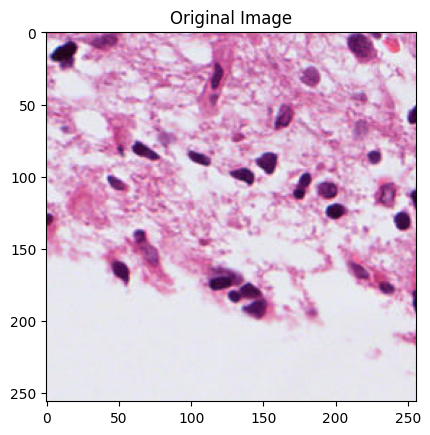

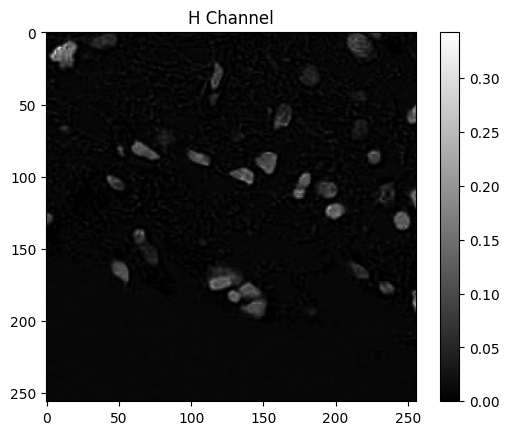

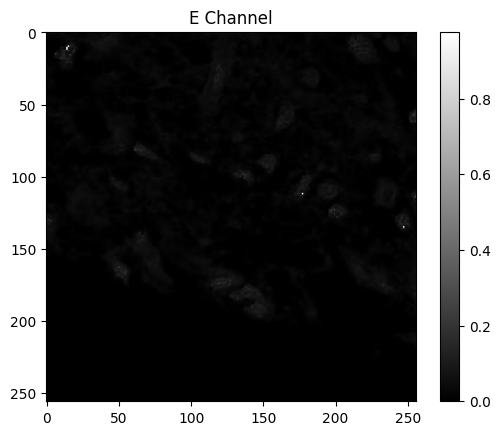

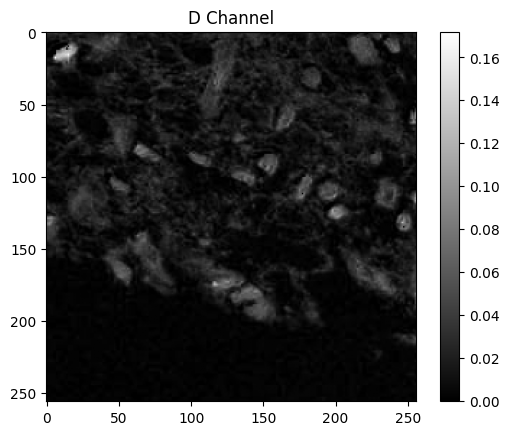

In [ ]:
image_folder = '/content/patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

# Replace 'path_to_image' with the path to the image you want to display
image_path = image_folder+'A1_0x40.png'
print('skimage version',skimage.__version__)
import matplotlib.pyplot as plt
I = rgba2rgb(imread(image_path)) #read sample RGB image
I_hed =  rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()
I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel');plt.show()
I_e = I_hed[:,:,1]; plt.figure();  plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel');plt.show()
I_d = I_hed[:,:,2]; plt.figure();  plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel');plt.show()


## Useful hints:
* Feel free to resize the images to reduce the amount of required compute. However, if you do this, please ensure that the code for doing this is included in your submission notebook.

* Look at glob (https://docs.python.org/3/library/glob.html) to get list of all file names in a given folder.

* For calculating various regression metrics, please see: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


In [2]:
import glob

# Define the folder where images are stored
image_folder = "/content/patches_256/"

# List all PNG images in the folder
image_files = glob.glob(image_folder + "*.png")

# Show first few filenames
print("Total images found:", len(image_files))
print("Example filenames:", image_files[:5])


Total images found: 12156
Example filenames: ['/content/patches_256/A1_30x114.png', '/content/patches_256/A1_34x56.png', '/content/patches_256/C1_23x101.png', '/content/patches_256/B1_26x86.png', '/content/patches_256/C1_57x111.png']


## Question 1

### i. Counting Examples: Determine the number of "examples" or spots in each specimen.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv")

# Extract specimen ID from 'VisSpot' column
df["specimen_id"] = df.VisSpot.apply(lambda x: x.split('-')[2])

# Create an image ID column to match with filenames
df["image_id"] = df["specimen_id"] + "_" + df["id"]

# Set image_id as index
df = df.set_index("image_id").sort_index()

# Count the number of spots in each specimen
spot_counts = df["specimen_id"].value_counts()
print("Number of spots in each specimen:\n", spot_counts)


Number of spots in each specimen:
 specimen_id
C1    4129
A1    2894
D1    1753
B1    1145
Name: count, dtype: int64


### ii. Protein Expression Histograms: For each specimen, generate histograms to visualize the expression values of 'CD11b' and discuss your observations.
The histogram shows that CD11b expression levels vary across specimens. C1 has most values around -1, while A1 is more spread out, with peaks near -3 and 1. D1 has two main peaks around -3.5 and 0, and B1 is more evenly spread. Many values are negative, which might mean the data was adjusted in some way. A1 looks different from the other specimens, which could make predictions harder. Some sharp spikes suggest possible outliers. The data isn’t evenly spread, with C1 having more low values and A1 and D1 showing more variation. This means we need to be careful when training the model and might need to handle outliers.

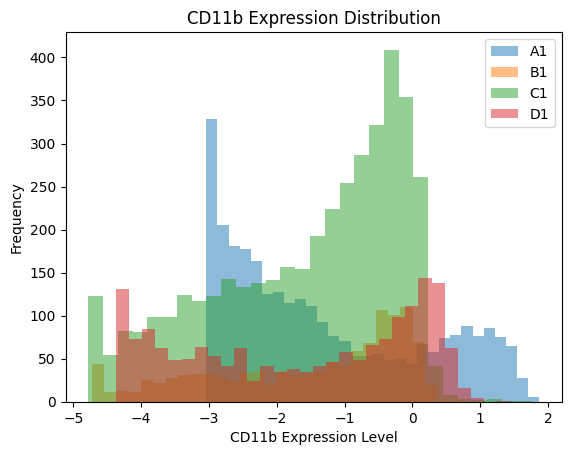

In [4]:
import matplotlib.pyplot as plt

# Create histograms for CD11b expression in each specimen
for specimen in df["specimen_id"].unique():
    subset = df[df["specimen_id"] == specimen]
    plt.hist(subset["CD11b"], bins=30, alpha=0.5, label=specimen)

plt.xlabel("CD11b Expression Level")
plt.ylabel("Frequency")
plt.legend()
plt.title("CD11b Expression Distribution")
plt.show()


### iii. Image Pre-processing: Convert a selection of images from RGB to HED color space, focusing on the Hematoxylin channel (H) to highlight cellular nuclei. Provide visual examples following the hints in the notebook linked above.
A selection of tissue images was converted from RGB to HED color space, focusing on the Hematoxylin (H) channel. This channel highlights cell nuclei, which are important for analyzing protein expression. The images on the left show the original RGB tissue samples, while the right images display the Hematoxylin channel, where nuclei appear bright against a dark background. This helps capture key structures in the tissue that may be useful for predicting protein expression.

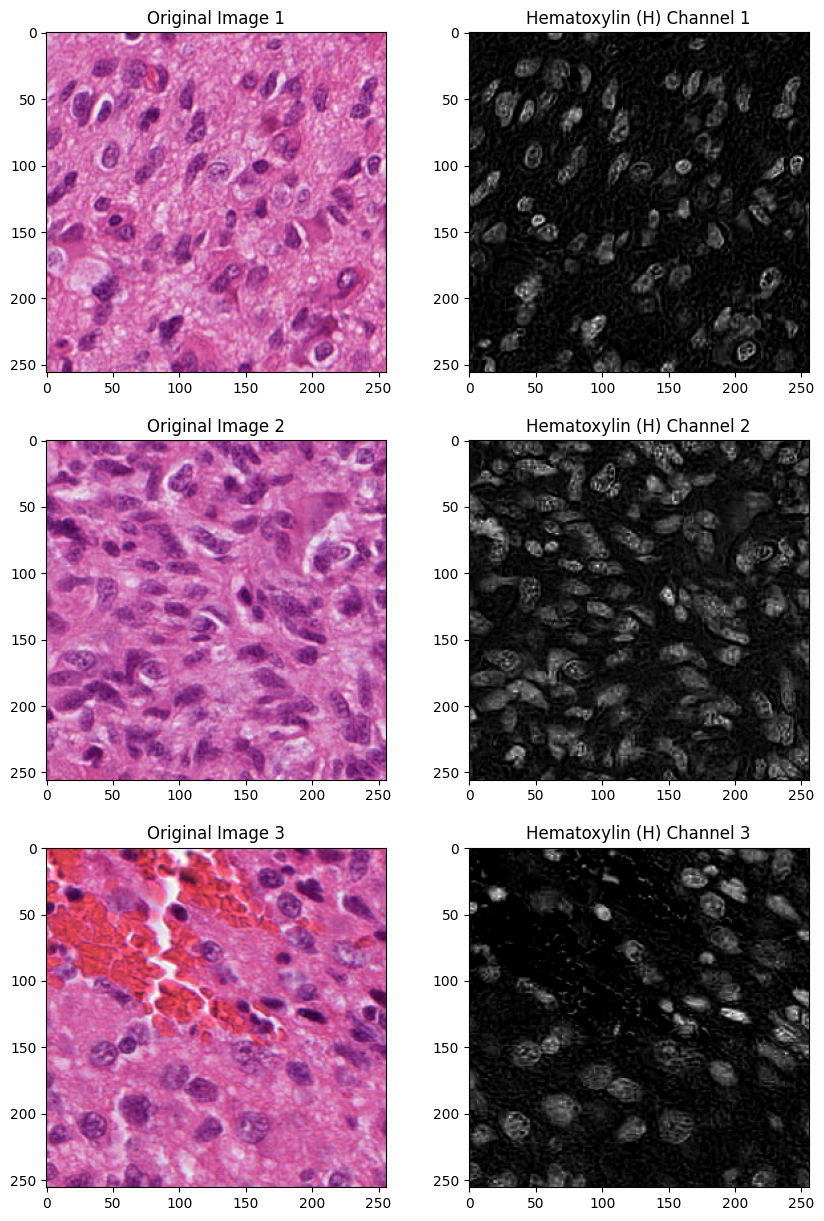

In [12]:
import glob
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2hed

image_folder = "/content/patches_256/"
image_files = glob.glob(image_folder + "*.png")[:3]  # Select 3 images

fig, axes = plt.subplots(len(image_files), 2, figsize=(10, 5 * len(image_files)))

for i, image_path in enumerate(image_files):
    I = imread(image_path)  # Read image directly (without rgba2rgb)

    if I.shape[-1] == 4:  # Check if the image has an alpha channel (RGBA)
        I = I[:, :, :3]  # Remove the alpha channel to keep only RGB

    I_hed = rgb2hed(I)  # Convert to HED
    I_h = I_hed[:, :, 0]  # Extract Hematoxylin (H) channel

    axes[i, 0].imshow(I)
    axes[i, 0].set_title(f"Original Image {i+1}")
    axes[i, 1].imshow(I_h, cmap="gray")
    axes[i, 1].set_title(f"Hematoxylin (H) Channel {i+1}")

plt.show()


### iv. Calculate the average intensity of the H-channel for each image. Create a scatter plot comparing these averages against the expression levels of CD11b for each image. Assess the correlation between H-channel intensity and CD11b expression. Discuss the potential of H-channel average as a predictive feature for CD11b expression.
  The goal of this step is to determine whether Hematoxylin (H) channel intensity is correlated with CD11b protein expression levels.
  We need to process each image, convert it to HED color space, extract the Hematoxylin (H) channel, and calculate the average intensity.

#### a) Extract Mean H-Channel Intensity

The first step is extracting the mean H-channel intensity from each image. Since the images are in RGB format, they are converted into HED color space to isolate the Hematoxylin (H) channel, which highlights cell nuclei. The average intensity of the H-channel is then calculated for each image and added to the dataset.



In [14]:
import numpy as np
from tqdm import tqdm
from skimage.io import imread
from skimage.color import rgb2hed

h_channel_avg = []

# Process each image
for img_id in tqdm(df.index):
    image_path = image_folder + img_id + ".png"

    try:
        I = imread(image_path)  # Read image

        # If the image has 4 channels (RGBA), remove the alpha channel
        if I.shape[-1] == 4:
            I = I[:, :, :3]  # Keep only RGB channels

        I_hed = rgb2hed(I)  # Convert to HED
        h_channel_avg.append(np.mean(I_hed[:, :, 0]))  # Mean of H-channel

    except FileNotFoundError:
        h_channel_avg.append(None)

df["H_Channel_Avg"] = h_channel_avg
df = df.dropna(subset=["H_Channel_Avg"])


100%|██████████| 9921/9921 [02:05<00:00, 79.25it/s] 


#### b) Scatter Plot of H-Channel Intensity vs. CD11b
Once the H-channel intensity values are extracted, the second step is to visualize their relationship with CD11b expression using a scatter plot. The scatter plot below shows H-Channel intensity on the x-axis and CD11b expression levels on the y-axis.


The scatter plot indicates a wide spread of points without a clear trend, suggesting that H-Channel intensity may not be a strong predictor of CD11b expression. To confirm this observation, the Pearson correlation coefficient is computed.

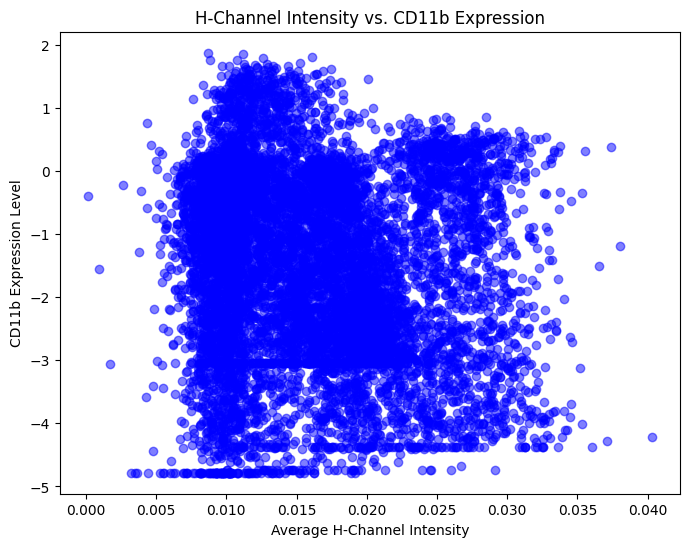

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df["H_Channel_Avg"], df["CD11b"], alpha=0.5, color="blue")
plt.xlabel("Average H-Channel Intensity")
plt.ylabel("CD11b Expression Level")
plt.title("H-Channel Intensity vs. CD11b Expression")
plt.show()


#### c) Compute Pearson Correlation
If the correlation value is close to +1 or -1, it indicates a strong linear relationship, meaning H-channel intensity could be a good predictor of CD11b expression. If the correlation value is close to 0, it suggests no strong relationship between the two variables, meaning other features may be needed for better prediction.

The Pearson correlation of -0.157 indicates a very weak negative relationship between the H-channel intensity and CD11b expression. This means that as H-channel intensity slightly increases, CD11b expression tends to decrease, but the relationship is very weak and likely not significant.

The results show that the Hematoxylin (H) channel intensity has little impact on CD11b expression levels. This suggests that other image-based features may be more relevant for prediction.


In [16]:
from scipy.stats import pearsonr

# Compute Pearson correlation
correlation, _ = pearsonr(df["H_Channel_Avg"], df["CD11b"])

# Print result
print(f"Pearson Correlation: {correlation:.3f}")


Pearson Correlation: -0.157


### v. Calculate the average intensity of the blue channel for each image. Create a scatter plot comparing these averages against the expression levels of CD11b for each image. Assess the correlation between E-channel intensity and CD11b expression. Discuss the potential of E-channel average as a predictive feature for CD11b expression.

In [1]:
  import numpy as np
from tqdm import tqdm
from skimage.io import imread

blue_channel_avg = []

for img_id in tqdm(df.index):
    image_path = image_folder + img_id + ".png"

    try:
        I = imread(image_path)
        if I.shape[-1] == 4:
            I = I[:, :, :3]  # Remove alpha channel if present
        blue_channel_avg.append(np.mean(I[:, :, 2]))  # Extract Blue channel mean

    except FileNotFoundError:
        blue_channel_avg.append(None)

df["Blue_Channel_Avg"] = blue_channel_avg
df = df.dropna(subset=["Blue_Channel_Avg"])


NameError: name 'df' is not defined